In [5]:
import cv2
import numpy as np
from skimage import color
from PIL import Image
import random
import matplotlib.pyplot as plt

In [6]:
def normalize(image):
  a = np.array(image.resize((64, 64)))
  a = a/255
  res = a[:,:,0]
  threshold = 0.46
  normal_img = np.where(res <= threshold, 1, -1)
  
  return normal_img

In [7]:
def MdHebbian_Weight(input):
  n = np.size(input, axis = 0)
  W = np.zeros((n, n))
  I = np.identity(n)
  ST = np.transpose(input)
  W = np.dot(input, ST)-I
  return W

In [8]:
trainImg = Image.open('train.jpg')
testImg1 = Image.open('test1.png')
testImg2 = Image.open('test2.png')
testImg3 = Image.open('test3.png')

In [9]:
train = normalize(trainImg)
test1 = normalize(testImg1)
test2 = normalize(testImg2)
test3 = normalize(testImg3)

Text(0.5, 1.0, 'test3')

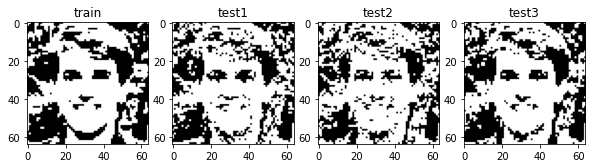

In [10]:
f, axis = plt.subplots(1,4, figsize=(10,10))
axis[0].imshow(train, cmap = "Greys")
axis[0].set_title("train")
axis[1].imshow(test1, cmap = "Greys")
axis[1].set_title("test1")
axis[2].imshow(test2, cmap = "Greys")
axis[2].set_title("test2")
axis[3].imshow(test3, cmap = "Greys")
axis[3].set_title("test3")

In [11]:
a = np.size(train, axis = 0)
b = np.size(train, axis = 1)
M = a*b

In [12]:
train_input = train.reshape(M, 1)
weight = MdHebbian_Weight(train_input)
print(weight)

[[ 0.  1. -1. ...  1.  1.  1.]
 [ 1.  0. -1. ...  1.  1.  1.]
 [-1. -1.  0. ... -1. -1. -1.]
 ...
 [ 1.  1. -1. ...  0.  1.  1.]
 [ 1.  1. -1. ...  1.  0.  1.]
 [ 1.  1. -1. ...  1.  1.  0.]]


In [13]:
test1_flat = test1.copy().reshape(1, M)
test2_flat = test2.copy().reshape(1, M)
test3_flat = test3.copy().reshape(1, M)

In [14]:
def Activation(y):
  out = 0
  if (y < 0):
    out = -1
  else:
      out = 1
  return out

In [15]:
N = 0
K = 50
outputs = []
hamming1 = []
conv = False
iter = 0
test = test1_flat.copy()
while not conv:
  iter = iter + 1
  index = random.sample(range(0, M), M)
  for i in index:
    N = N + 1
    t_in = test@weight[i] + test1_flat[0][i]
    t = Activation(t_in)
    test[0][i] = t
    if (N%50 == 0):
      outputs.append(test.copy().reshape(train.shape))
      hamming1.append(np.sum(outputs[len(outputs) - 1] != train))
  outputs.append(test.copy().reshape(train.shape))
  conv = np.sum(outputs[len(outputs) - 1] == train) == 4096

outputs.insert(0, test1.reshape(train.shape))

Text(0.5, 1.0, 'Last iteration')

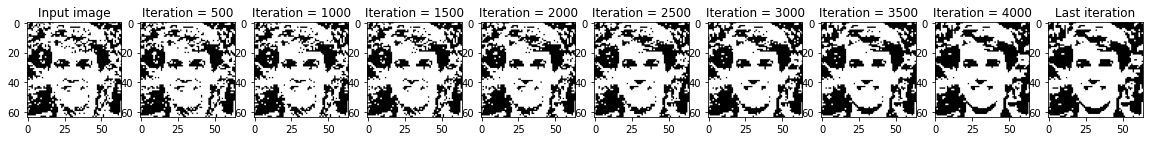

In [16]:
f, axarr = plt.subplots(1,10, figsize=(20,20))
axarr[0].imshow(outputs[0], cmap='Greys')
axarr[0].set_title('Input image')
for i in range(1, 9):
  axarr[i].imshow(outputs[(i)*10], cmap='Greys')
  axarr[i].set_title(f'Iteration = {i*500}')
axarr[9].imshow(outputs[len(outputs) - 1], cmap='Greys')
axarr[9].set_title('Last iteration')


In [17]:
N = 0
K = 50
outputs = []
hamming2 = []
test = test2_flat
conv = False
iter = 0
while not conv:
  iter = iter + 1
  index = random.sample(range(0, M), M)
  for i in index:
    N = N + 1
    t_in = test@weight[i] + test2_flat[0][i]
    t = Activation(t_in)
    test[0][i] = t
    if (N%50 == 0):
      outputs.append(test.copy().reshape(train.shape))
      hamming2.append(np.sum(outputs[len(outputs) - 1] != train))
  outputs.append(test.copy().reshape(train.shape))
  conv = np.sum(outputs[len(outputs) - 1] == train) == M

outputs.insert(0, test2.reshape(train.shape))

Text(0.5, 1.0, 'Last iteration')

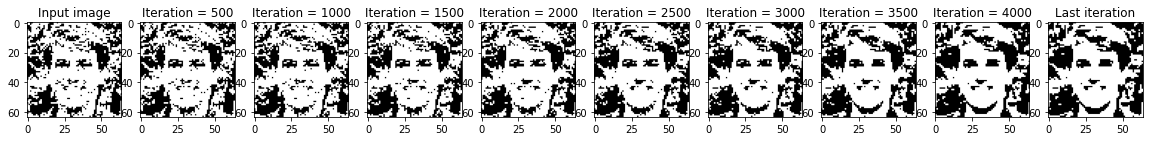

In [18]:
f, axarr = plt.subplots(1,10, figsize=(20,20))
axarr[0].imshow(outputs[0], cmap='Greys')
axarr[0].set_title('Input image')
for i in range(1, 9):
  axarr[i].imshow(outputs[(i)*10], cmap='Greys')
  axarr[i].set_title(f'Iteration = {i*500}')
axarr[9].imshow(outputs[len(outputs) - 1], cmap='Greys')
axarr[9].set_title('Last iteration')

In [19]:
N = 0
K = 50
outputs = []
hamming3 = []
test = test3_flat
conv = False
iter = 0
while not conv:
  iter = iter + 1
  index = random.sample(range(0, M), M)
  for i in index:
    N = N + 1
    t_in = test@weight[i] + test3_flat[0][i]
    t = Activation(t_in)
    test[0][i] = t
    if (N%50 == 0):
      outputs.append(test.copy().reshape(train.shape))
      hamming3.append(np.sum(outputs[len(outputs) - 1] != train))
  outputs.append(test.copy().reshape(train.shape))
  conv = np.sum(outputs[len(outputs) - 1] == train) == M

outputs.insert(0, test3.reshape(train.shape))

Text(0.5, 1.0, 'Last iteration')

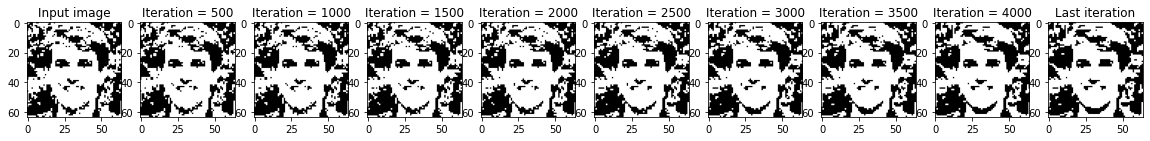

In [20]:
f, axarr = plt.subplots(1,10, figsize=(20,20))
axarr[0].imshow(outputs[0], cmap='Greys')
axarr[0].set_title('Input image')
for i in range(1, 9):
  axarr[i].imshow(outputs[(i)*10], cmap='Greys')
  axarr[i].set_title(f'Iteration = {i*500}')
axarr[9].imshow(outputs[len(outputs) - 1], cmap='Greys')
axarr[9].set_title('Last iteration')

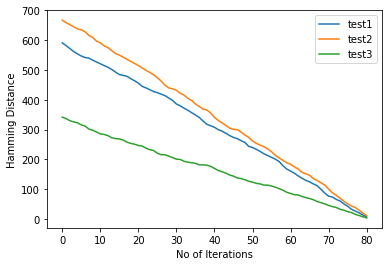

In [21]:
plt.plot(hamming1, label = "test1")
plt.plot(hamming2, label = "test2")
plt.plot(hamming3, label = "test3")
plt.xlabel('No of Iterations')
plt.ylabel('Hamming Distance')
plt.legend()
plt.show()